In [1]:
import pandas as pd
import numpy as np

In [2]:
import gensim

In [3]:
import os
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim.utils import simple_preprocess

In [4]:
story=[]
for filename in os.listdir(path='/Users/subhajeetkhawas/Desktop/CampusX/NLP/GOT Data'):
    f = open(os.path.join('/Users/subhajeetkhawas/Desktop/CampusX/NLP/GOT Data',filename),encoding="cp1252")
    corpus = f.read()
    raw_sent = sent_tokenize(corpus)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))

In [5]:
story

[['george',
  'martin',
  'dance',
  'with',
  'dragons',
  'book',
  'five',
  'of',
  'song',
  'of',
  'ice',
  'and',
  'fire',
  'dedication',
  'this',
  'one',
  'is',
  'for',
  'my',
  'fans',
  'for',
  'lodey',
  'trebla',
  'stego',
  'pod',
  'caress',
  'yags',
  'ray',
  'and',
  'mr',
  'kate',
  'chataya',
  'mormont',
  'mich',
  'jamie',
  'vanessa',
  'ro',
  'for',
  'stubby',
  'louise',
  'agravaine',
  'wert',
  'malt',
  'jo',
  'mouse',
  'telisiane',
  'blackfyre',
  'bronn',
  'stone',
  'coyote',
  'daughter',
  'and',
  'the',
  'rest',
  'of',
  'the',
  'madmen',
  'and',
  'wild',
  'women',
  'of',
  'the',
  'brotherhood',
  'without',
  'banners',
  'for',
  'my',
  'website',
  'wizards',
  'elio',
  'and',
  'linda',
  'lords',
  'of',
  'westeros',
  'winter',
  'and',
  'fabio',
  'of',
  'wic',
  'and',
  'gibbs',
  'of',
  'dragonstone',
  'who',
  'started',
  'it',
  'all',
  'for',
  'men',
  'and',
  'women',
  'of',
  'asshai',
  'in',
  '

In [6]:
def remove_stopwords(text):
    l1=[]
    l2=[]
    for e in text:
        for f in e:
            if f not in stopwords.words("english"):
                l1.append(f)
        l2.append(l1)
        l1=[]
    return l2

In [7]:
story1=remove_stopwords(story)

In [8]:
len(story1)

145020

In [9]:
len(story)

145020

In [10]:
model=gensim.models.Word2Vec(window=10, min_count=2)

In [11]:
model.build_vocab(story1)

In [12]:
model.train(story1, total_examples=model.corpus_count, epochs=model.epochs)

(4397315, 4579390)

In [13]:
model.wv.most_similar('daenerys')

[('stormborn', 0.883045494556427),
 ('unburnt', 0.8686043620109558),
 ('dorne', 0.829869270324707),
 ('elia', 0.8249053955078125),
 ('court', 0.822055459022522),
 ('myrcella', 0.820639967918396),
 ('viserys', 0.813990592956543),
 ('targaryen', 0.8132277131080627),
 ('loraq', 0.8115002512931824),
 ('regent', 0.8109459280967712)]

In [33]:
model.wv.most_similar('drogon')

[('crawled', 0.9692618250846863),
 ('crawling', 0.9688873887062073),
 ('wriggling', 0.96852707862854),
 ('sands', 0.9673538208007812),
 ('entrails', 0.9665653705596924),
 ('hangings', 0.9664185047149658),
 ('shift', 0.9663729667663574),
 ('cover', 0.9655769467353821),
 ('patter', 0.9655616283416748),
 ('coals', 0.9654814004898071)]

In [36]:
model.wv.most_similar('hound')

[('penny', 0.8747631907463074),
 ('brienne', 0.8746460676193237),
 ('harwin', 0.8649558424949646),
 ('exulting', 0.8610153794288635),
 ('innocently', 0.8600845336914062),
 ('pause', 0.8597284555435181),
 ('polliver', 0.8563386797904968),
 ('yank', 0.8555552363395691),
 ('bronn', 0.8501368761062622),
 ('domishman', 0.8492370247840881)]

In [37]:
model.wv.most_similar('lannister')

[('twin', 0.7846189737319946),
 ('casterly', 0.7819002270698547),
 ('tyana', 0.7716140747070312),
 ('wayward', 0.7624282836914062),
 ('kingsguard', 0.7417888045310974),
 ('tyrell', 0.7369199991226196),
 ('florent', 0.7326385974884033),
 ('mace', 0.732090413570404),
 ('house', 0.7308334112167358),
 ('larmister', 0.7283039689064026)]

In [14]:
model.wv.doesnt_match(['jon','rikon','robb','arya','sansa','bran'])

'jon'

In [15]:
model.wv.doesnt_match(['cersei', 'jaime', 'bronn', 'tyrion'])

'bronn'

In [16]:
model.wv['tyrion']

array([-0.6389132 ,  0.4614621 ,  0.3848182 , -2.2506912 ,  1.4822768 ,
       -0.7850466 ,  0.06316244,  0.83074266, -0.19352013, -0.00620373,
        0.11917963, -1.1355156 ,  1.0648901 ,  0.28814366,  0.7832986 ,
       -0.5918242 , -0.21233705, -0.26786873,  1.4709612 , -0.53384066,
       -0.00708075, -1.076091  , -0.22420566,  1.2344278 ,  0.74306333,
       -0.4027683 , -0.27064413,  0.537486  , -0.46718276,  1.0725223 ,
        0.04536411, -0.34847438,  0.5592141 , -1.1128995 ,  0.33632907,
        0.54803795, -0.6717058 ,  1.0532799 ,  0.21649002, -1.0596757 ,
        0.32938445, -0.60145247,  0.26919115, -0.01779381, -0.3404722 ,
       -0.5118402 , -0.46138045,  0.06156202, -0.7787752 ,  0.19549125,
        0.5595626 , -0.7734422 , -0.1224108 , -0.74779195,  0.875056  ,
        0.43901187,  0.93688595, -0.17234385, -0.31170958,  1.1965293 ,
       -1.6841881 , -0.6076113 ,  0.11530283,  0.7373571 , -0.16703811,
       -0.4925553 ,  1.6028261 ,  1.1705521 , -0.4673822 ,  0.52

In [17]:
model.wv.similarity('arya','sansa')

0.81295216

In [18]:
model.wv.similarity('arya','jon')

0.5029363

In [19]:
model.wv.similarity('cersei','sansa')

0.69041276

In [20]:
model.wv.similarity('cersei','jon')

0.07327022

In [21]:
model.wv.get_normed_vectors()

array([[ 0.08066624,  0.11899216,  0.02942341, ..., -0.052453  ,
        -0.05217164,  0.02492634],
       [-0.21374224,  0.14123309,  0.1354408 , ..., -0.03656375,
        -0.10764652,  0.02841828],
       [ 0.03112496, -0.0004258 , -0.05641564, ..., -0.04810416,
         0.14230137, -0.18902476],
       ...,
       [ 0.13173832,  0.10348533,  0.09533237, ..., -0.04524257,
         0.01274679,  0.01451716],
       [-0.18015315,  0.03407577,  0.12190993, ..., -0.0789552 ,
         0.06689265, -0.0698048 ],
       [-0.14683945,  0.11066546,  0.12739885, ..., -0.02197257,
         0.05599109, -0.05745004]], dtype=float32)

In [22]:
y = model.wv.index_to_key

In [32]:
y

['said',
 'lord',
 'would',
 'one',
 'ser',
 'could',
 'man',
 'king',
 'men',
 'back',
 'well',
 'like',
 'jon',
 'father',
 'old',
 'hand',
 'even',
 'tyrion',
 'never',
 'know',
 'see',
 'made',
 'eyes',
 'black',
 'told',
 'lady',
 'thought',
 'time',
 'long',
 'might',
 'us',
 'come',
 'face',
 'still',
 'head',
 'red',
 'way',
 'boy',
 'page',
 'must',
 'queen',
 'good',
 'two',
 'brother',
 'night',
 'little',
 'took',
 'came',
 'though',
 'say',
 'three',
 'away',
 'dead',
 'son',
 'blood',
 'take',
 'go',
 'half',
 'make',
 'arya',
 'saw',
 'day',
 'white',
 'jaime',
 'first',
 'look',
 'want',
 'much',
 'enough',
 'sword',
 'tell',
 'girl',
 'bran',
 'great',
 'looked',
 'left',
 'knew',
 'asked',
 'gave',
 'maester',
 'called',
 'wall',
 'every',
 'heard',
 'sansa',
 'let',
 'yet',
 'went',
 'turned',
 'dany',
 'behind',
 'need',
 'around',
 'woman',
 'another',
 'snow',
 'beneath',
 'across',
 'knight',
 'keep',
 'grace',
 'found',
 'gold',
 'last',
 'cersei',
 'castle',
 '

In [29]:
len(y)

17310

In [31]:
model.corpus_total_words

915878

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components=3)

In [26]:
X = pca.fit_transform(model.wv.get_normed_vectors())

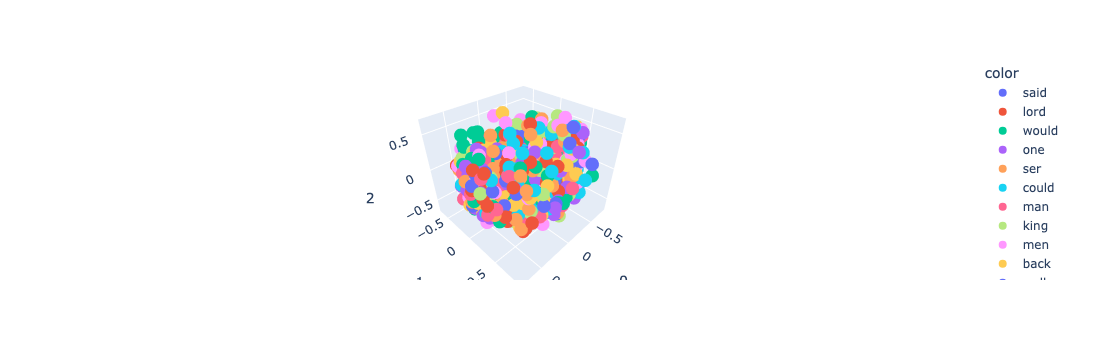

In [28]:
import plotly.express as px
fig = px.scatter_3d(X[:1000],x=0,y=1,z=2, color=y[:1000])
fig.show()